## Bibliotheken importieren und Modell initialisieren

In [1]:
import deepwaveform as dwf
import matplotlib.pyplot as plt
import torch
df = dwf.load_dataset("../data/elbabschnitt.csv")
df

,class,x,y,z,0,1,2,3,4,5,...,190,191,192,193,194,195,196,197,198,199
index,,,,,,,,,,,,,,,,,,,,,
104223,0,-95.535490,-8.022506,24.878581,144,143,144,146,145,142,...,0,0,0,0,0,0,0,0,0,0
104224,0,-95.652666,-8.091995,24.847583,143,148,143,150,138,139,...,0,0,0,0,0,0,0,0,0,0
104225,0,-95.754938,-8.164938,24.852584,142,151,138,148,147,139,...,0,0,0,0,0,0,0,0,0,0
104226,0,-95.855210,-8.237942,24.862586,145,149,143,146,142,144,...,0,0,0,0,0,0,0,0,0,0
104228,0,-95.505481,-7.330005,24.827580,143,149,145,146,141,149,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148093,0,106.374632,-1.342029,23.390748,148,149,144,149,138,148,...,0,0,0,0,0,0,0,0,0,0
148094,0,106.350848,-1.466382,23.382747,146,141,138,152,146,148,...,0,0,0,0,0,0,0,0,0,0
148095,0,106.337122,-1.589038,23.411747,146,143,145,152,140,139,...,0,0,0,0,0,0,0,0,0,0


In [2]:
ds = dwf.WaveFormDataset(df, classcol=None)                     # Datensatz in passende Form bringen
model = dwf.AutoEncoder(hidden=12)                              # Modell initialisieren
trainer = dwf.Trainer(model, ds, batch_size=1024, epochs=30)    # Trainer mit Datensatz und Modell initialisieren

## Trainieren des Autoencoders

epoch=005 E[loss]=0.00098 Var[loss]=0.00000
epoch=010 E[loss]=0.00050 Var[loss]=0.00000
epoch=015 E[loss]=0.00039 Var[loss]=0.00000
epoch=020 E[loss]=0.00033 Var[loss]=0.00000
epoch=025 E[loss]=0.00031 Var[loss]=0.00000
epoch=030 E[loss]=0.00030 Var[loss]=0.00000


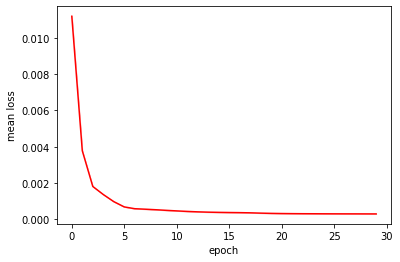

In [3]:
stats = []
for epoch, result in enumerate(trainer.train_autoencoder(sparsity=0), start=1):
    stats.append(result)
    if epoch%5==0:
        print("epoch=%s E[loss]=%.5f Var[loss]=%.5f" % (str(epoch).zfill(3), 
                                                        result["meanloss"], 
                                                        result["varloss"]))

fig, ax = plt.subplots(1,1)
dwf.plot_training_progress(stats, ax)

## Datensatz annotieren
Mit der Funktion `annotate_dataframe` des Autoencoders werden neue Spalten hinzugefügt, die die Kodierung und die rekonstruierten Waveforms enthalten.

In [4]:
model.annotate_dataframe(df,                                    # Der Datensatz, der annotiert werden soll
                         encoding_prefix="hidden_",             # Spaltenpräfix der Kodierung
                         reconstruction_prefix="reconstr_")     # Spaltenpräfix der Rekonstruktion
df

,class,x,y,z,0,1,2,3,4,5,...,reconstr_54,reconstr_55,reconstr_56,reconstr_57,reconstr_58,reconstr_59,reconstr_60,reconstr_61,reconstr_62,reconstr_63
index,,,,,,,,,,,,,,,,,,,,,
104223,0,-95.535490,-8.022506,24.878581,144,143,144,146,145,142,...,140.622360,144.657120,147.436340,146.429520,143.843658,145.594681,147.085678,134.908829,141.382401,142.664474
104224,0,-95.652666,-8.091995,24.847583,143,148,143,150,138,139,...,141.977951,147.088043,149.109741,148.818176,145.288635,146.474594,147.638916,135.352005,141.660461,142.189545
104225,0,-95.754938,-8.164938,24.852584,142,151,138,148,147,139,...,143.473633,147.075607,148.611160,147.051208,143.316620,144.555573,145.357956,133.187408,139.674820,141.260071
104226,0,-95.855210,-8.237942,24.862586,145,149,143,146,142,144,...,141.059204,145.052414,147.586685,146.522430,144.015015,145.783676,147.400726,135.211243,141.695816,142.830826
104228,0,-95.505481,-7.330005,24.827580,143,149,145,146,141,149,...,142.361832,146.591873,149.314194,148.371414,145.980377,147.734818,149.286285,136.999512,143.219284,144.234451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148093,0,106.374632,-1.342029,23.390748,148,149,144,149,138,148,...,140.652954,143.568649,149.034866,146.442474,145.703461,147.826447,150.098984,137.689301,143.849655,145.377090
148094,0,106.350848,-1.466382,23.382747,146,141,138,152,146,148,...,140.419708,142.867523,146.771896,144.103668,142.856171,145.113159,147.575912,135.548187,142.044022,143.742477
148095,0,106.337122,-1.589038,23.411747,146,143,145,152,140,139,...,141.612335,145.359756,148.159760,146.775497,144.444885,146.177628,147.897598,135.412781,142.001282,143.117081


## Visualisierung der echten Waveform vs. Rekonstruktion

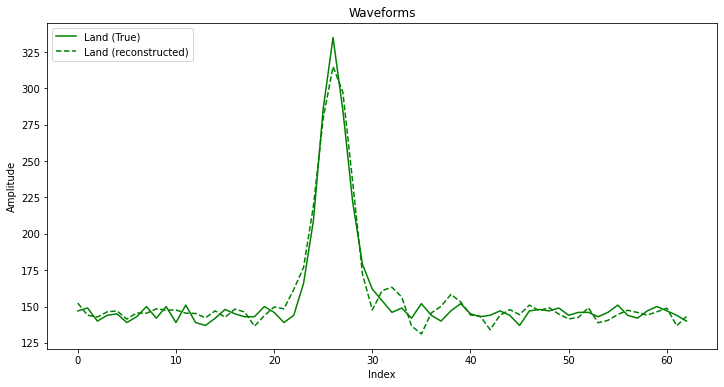

In [5]:
sampled = df.sample(n=1).reset_index()
fig, ax = plt.subplots(1, 1, figsize=(12,6))
dwf.plot_waveforms(sampled, 
                   ax, 
                   class_label_mapping=["Land (True)", "Water (True)"], 
                   class_style_mapping=["g-","b-"],
                   wv_cols=list(map(str, range(64))))
dwf.plot_waveforms(sampled, 
                   ax, 
                   class_label_mapping=["Land (reconstructed)", "Water (reconstructed)"], 
                   class_style_mapping=["g--","b--"],
                   wv_cols=["reconstr_%d" % idx for idx in range(64)])

## Speichern des Autoencoders

In [6]:
torch.save(model.state_dict(), "trained_models/autoencoder.pt")